# Parte 1

Se importan las librerías necesarias:

In [1]:
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np

Se define la función que grafica las imágenes:

In [2]:
def plot_comparativo(original, modified):
    plt.figure(figsize=(8, 5))
    
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(original, cv2.COLOR_BGR2RGB))
    plt.title('Imagen original')
    plt.axis('off')
    
    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(modified, cv2.COLOR_BGR2RGB))
    plt.title('Imagen transformada')
    plt.axis('off')
    
    plt.subplots_adjust(wspace=0, hspace=0)
    plt.show()


### Coordenadas cromáticas

Se define la función que transforma las imágenes a coordenadas cromáticas:

In [3]:
def img2coor_crom(image):
    float_image = np.float32(image) / 255
    
    R, G, B = cv2.split(float_image)
    sum_channels = R + G + B
    
    valid_mask = sum_channels != 0

    r = np.zeros_like(R)
    g = np.zeros_like(G)
    b = np.zeros_like(B)

    r[valid_mask] = R[valid_mask] / sum_channels[valid_mask]
    g[valid_mask] = G[valid_mask] / sum_channels[valid_mask]
    b[valid_mask] = B[valid_mask] / sum_channels[valid_mask]
    
    img_crom = cv2.merge((r * 255, g * 255, b * 255)).astype(np.uint8)
    
    return img_crom


Se leen las imágenes y se tranforman:

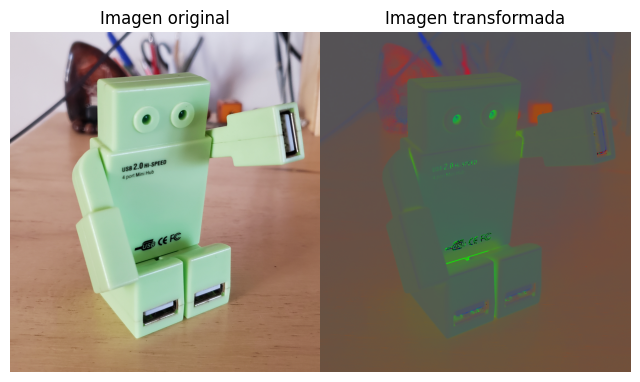

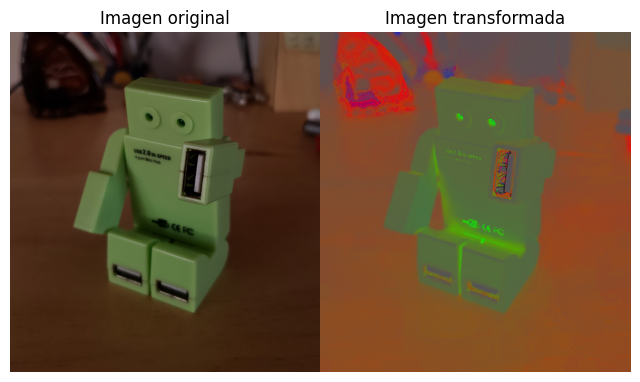

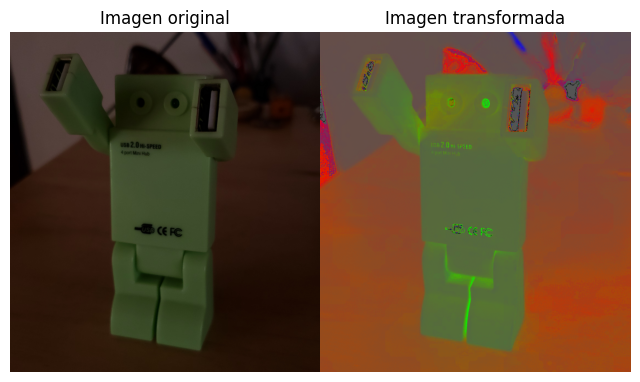

In [4]:
path = 'coord_cromaticas'
images = [f for f in os.listdir(path) if os.path.isfile(os.path.join(path, f))]

for image_name in images:
    image_path = os.path.join(path, image_name)
    image = cv2.imread(image_path)
    
    if image is not None:
        img_crom = img2coor_crom(image)
        plot_comparativo(image, img_crom)


### White patch

Se define la función que transforma las imágenes aplicando white patch:

In [5]:
def white_patch(image):
    float_image = np.float32(image) / 255
    
    R, G, B = cv2.split(float_image)
    R_max, G_max, B_max = R.max(), G.max(), B.max()
    
    R = R / R_max
    G = G / G_max
    B = B / B_max
    
    R = np.clip(R, 0, 1)
    G = np.clip(G, 0, 1)
    B = np.clip(B, 0, 1)
    
    corrected_image = cv2.merge((R * 255, G * 255, B * 255)).astype(np.uint8)
    
    return corrected_image


Se leen las imágenes y se tranforman:

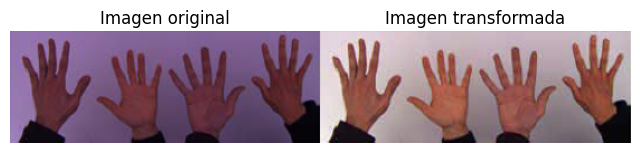

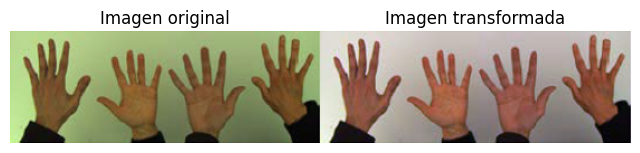

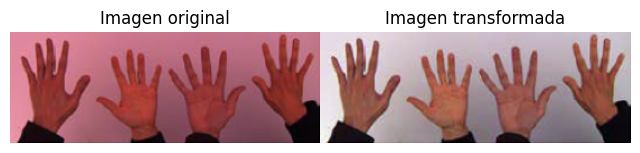

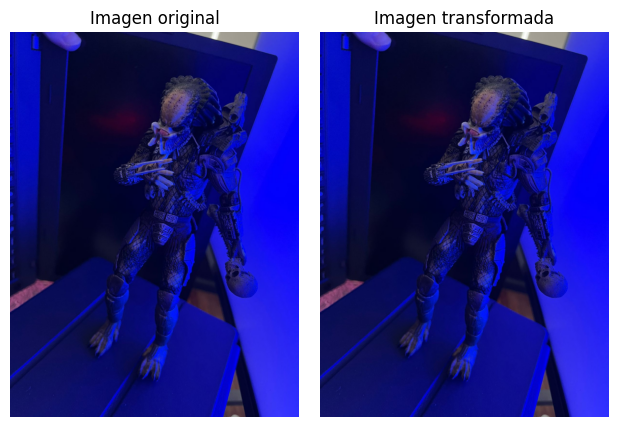

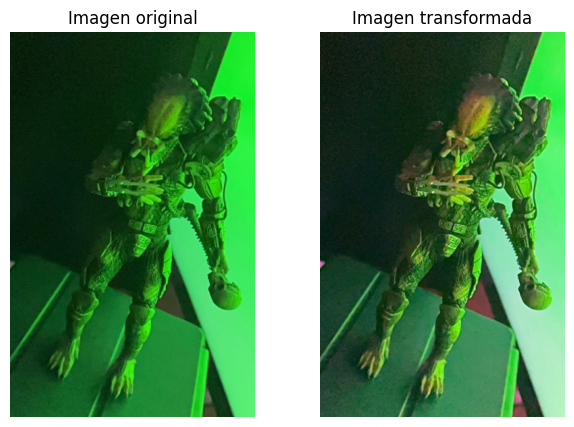

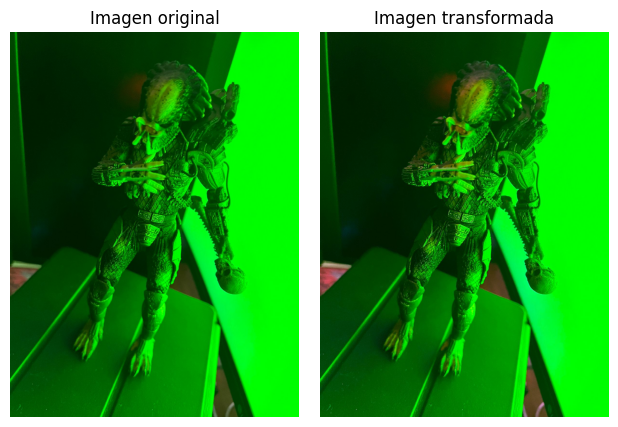

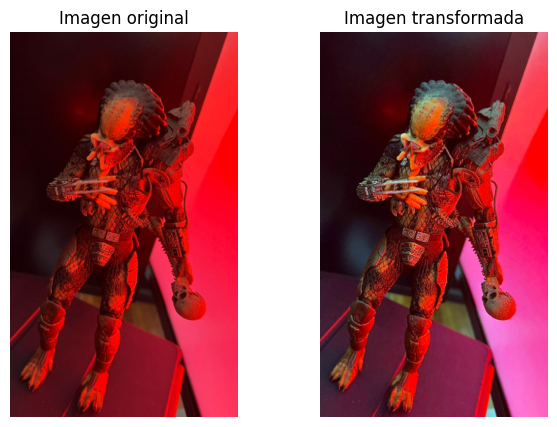

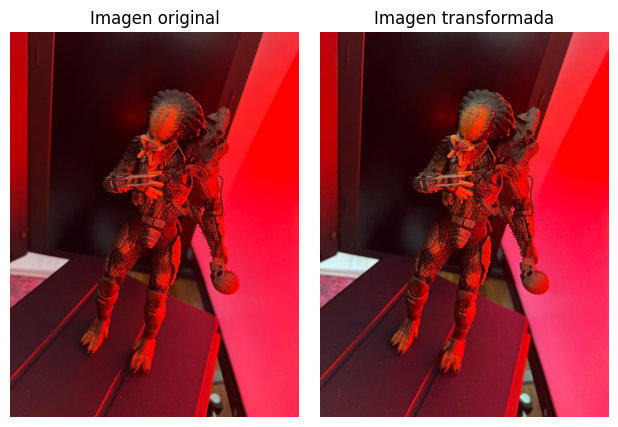

In [6]:
path = 'white_patch'
images = [f for f in os.listdir(path) if os.path.isfile(os.path.join(path, f))]

for image_name in images:
    image_path = os.path.join(path, image_name)
    image = cv2.imread(image_path)
    
    if image is not None:
        corrected_image = white_patch(image)
        plot_comparativo(image, corrected_image)


# Parte 2

### Comparar histogramas

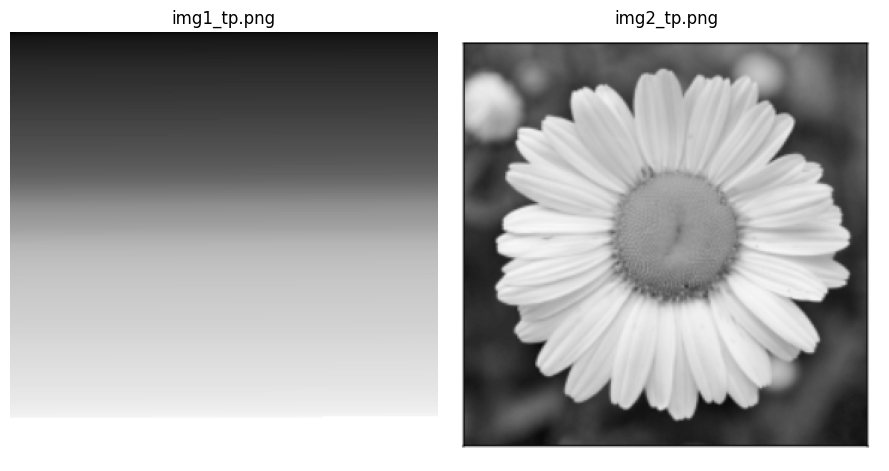

In [7]:
import cv2
import matplotlib.pyplot as plt

img1 = cv2.imread('img1_tp.png', cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread('img2_tp.png', cv2.IMREAD_GRAYSCALE)

fig, ax = plt.subplots(1, 2, figsize=(9, 5))

ax[0].imshow(img1, cmap='gray')
ax[0].axis('off')
ax[0].set_title('img1_tp.png')

ax[1].imshow(img2, cmap='gray')
ax[1].axis('off')
ax[1].set_title('img2_tp.png')

plt.tight_layout()
plt.show()


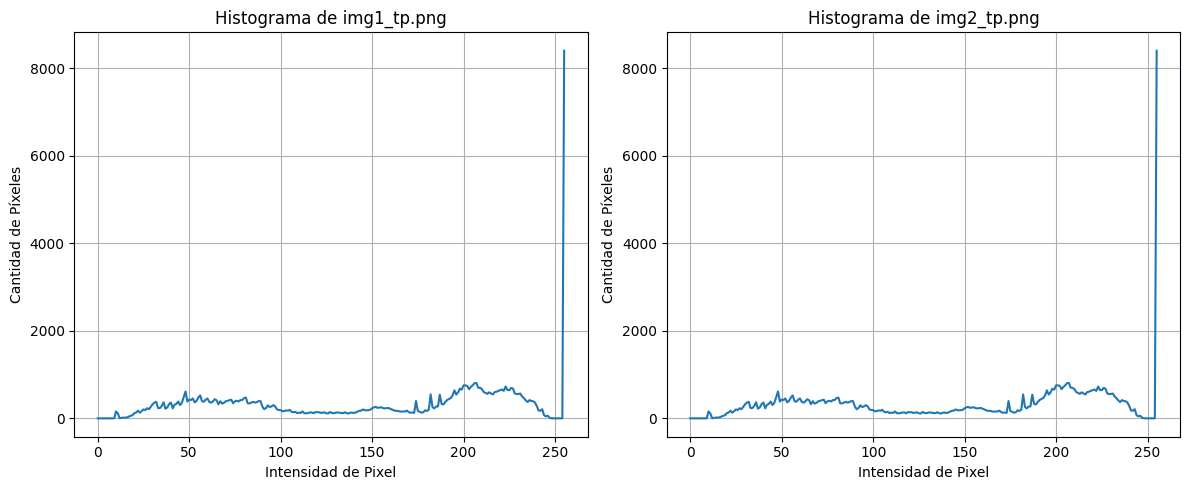

In [8]:
num_bins = 256

hist_img1 = cv2.calcHist([img1], [0], None, [num_bins], [0,256])
hist_img2 = cv2.calcHist([img2], [0], None, [num_bins], [0,256])

fig, ax = plt.subplots(1, 2, figsize=(12, 5))

ax[0].plot(hist_img1)
ax[0].set_title('Histograma de img1_tp.png')
ax[0].set_xlabel('Intensidad de Pixel')
ax[0].set_ylabel('Cantidad de Píxeles')
ax[0].grid(True)

ax[1].plot(hist_img2)
ax[1].set_title('Histograma de img2_tp.png')
ax[1].set_xlabel('Intensidad de Pixel')
ax[1].set_ylabel('Cantidad de Píxeles')
ax[1].grid(True)

plt.tight_layout()
plt.show()


Al comparar los histogramas de img1_tp.png y img2_tp.png, observamos que a pesar de que las imágenes son visualmente distintas en términos de estructura, forma y textura, sus histogramas son notablemente similares. Ambos histogramas muestran distribuciones de intensidad comparables a lo largo del rango de valores de píxeles.


Dicho esto, esta similitud en los histogramas de dos imágenes visualmente diferentes destaca una limitación fundamental de los histogramas como feature. No capturan la disposición espacial ni las relaciones entre píxeles adyacentes en una imagen. Por lo tanto, mientras que los histogramas proporcionan información sobre la distribución de intensidades en una imagen, no ofrecen información sobre patrones, estructuras o texturas.

Si estuviéramos entrenando un modelo de clasificación o detección de imágenes y usáramos solo histogramas como feature, podríamos encontrar dificultades para diferenciar entre imágenes que tienen histogramas similares pero son visualmente diferentes. Por lo tanto, si bien los histogramas pueden ser útiles como una de las features en un conjunto más amplio de features, confiar exclusivamente en ellos podría ser insuficiente, especialmente si las imágenes en el conjunto de datos tienen estructuras o texturas variadas.

Después de este análisis podemos concluir que: mientras que los histogramas pueden ser una característica valiosa en ciertos contextos, no son una representación completa de una imagen. Para tareas de clasificación o detección más complejas, sería mejor opción complementar los histogramas con otras características o utilizar técnicas más avanzadas.

### Segmentación

Se muestra el histograma de los 3 canales (RGB):

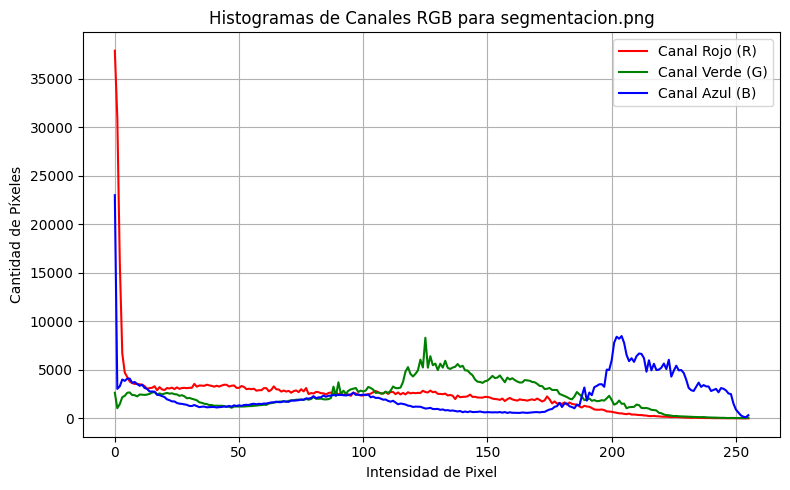

In [9]:
img_segmentacion = cv2.imread('segmentacion.png', cv2.IMREAD_COLOR)
img_segmentacion_rgb = cv2.cvtColor(img_segmentacion, cv2.COLOR_BGR2RGB)

hist_R = cv2.calcHist([img_segmentacion_rgb], [0], None, [num_bins], [0,256])
hist_G = cv2.calcHist([img_segmentacion_rgb], [1], None, [num_bins], [0,256])
hist_B = cv2.calcHist([img_segmentacion_rgb], [2], None, [num_bins], [0,256])

fig, ax = plt.subplots(figsize=(8, 5))

ax.plot(hist_R, color='red', label='Canal Rojo (R)')
ax.plot(hist_G, color='green', label='Canal Verde (G)')
ax.plot(hist_B, color='blue', label='Canal Azul (B)')
ax.set_title('Histogramas de Canales RGB para segmentacion.png')
ax.set_xlabel('Intensidad de Pixel')
ax.set_ylabel('Cantidad de Píxeles')
ax.grid(True)
ax.legend()

plt.tight_layout()
plt.show()


El histograma de los canales RGB para la imagen "segmentacion.png" muestra lo siguiente:

Canal Rojo (R): El histograma del canal rojo muestra un pico principal en las intensidades más bajas. Esto sugiere una presencia prominente de tonos rojizos oscuros en la imagen.
No hay un pico significativo en las intensidades más altas, lo que indica la ausencia de tonos rojizos claros en áreas extensas de la imagen.
El resto del histograma para este canal muestra una distribución relativamente uniforme, aunque con una densidad menor de píxeles en las intensidades intermedias.

Canal Verde (G): El histograma del canal verde muestra una distribución más amplia.
Existe un pico prominente en intensidades intermedias, indicando la presencia de tonos verdes medios en la imagen.
Se observan menores picos en las intensidades bajas y altas, lo que sugiere la presencia de tonos verdes tanto oscuros como claros, pero en menor medida en comparación con los tonos medios.

Canal Azul (B): El histograma del canal azul muestra un pico principal en las intensidades más bajas, indicando una presencia significativa de tonos azules oscuros.
Pero a diferencia del canal rojo, hay picos en las intensidades altas, lo que sugiere buena presencia de tonos azules claros en la imagen.
El histograma también presenta una densidad relativamente uniforme de píxeles en las intensidades intermedias.


Estas observaciones sobre los canales RGB indican la complejidad y diversidad de colores en la imagen, lo que nos da una idea de los diferentes elementos y paisajes presentes en ella.

A partir de esta observación, podemos inferir que la imagen tiene áreas con diferentes tonos de colores, lo que podría ayudarnos a segmentar diferentes elementos como agua, cielo y tierra.

Se muestra la imagen original:

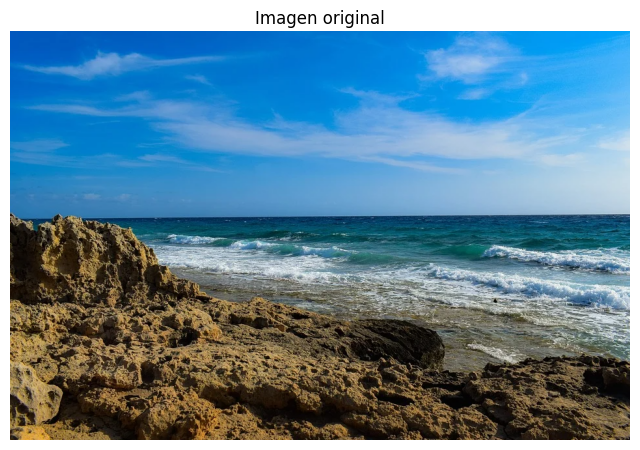

In [10]:
plt.figure(figsize=(8, 6))
plt.imshow(img_segmentacion_rgb)
plt.title('Imagen original')
plt.axis('off')
plt.show()


Se muestra la dispresión de los pixeles en los 3 canales:

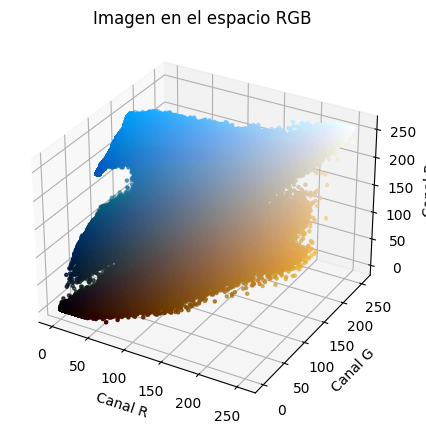

In [12]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import colors

R, G, B = cv2.split(img_segmentacion_rgb)

fig = plt.figure(figsize=(5, 5))
axis = fig.add_subplot(1, 1, 1, projection="3d")

pixel_colors = img_segmentacion_rgb.reshape((np.shape(img_segmentacion_rgb)[0]*np.shape(img_segmentacion_rgb)[1], 3))
norm = colors.Normalize(vmin=-1.,vmax=1.)
norm.autoscale(pixel_colors)
pixel_colors = norm(pixel_colors).tolist()

axis.scatter(R.flatten(), G.flatten(), B.flatten(), facecolors=pixel_colors, marker=".")
axis.set_title("Imagen en el espacio RGB")
axis.set_xlabel("Canal R")
axis.set_ylabel("Canal G")
axis.set_zlabel("Canal B")
plt.show()

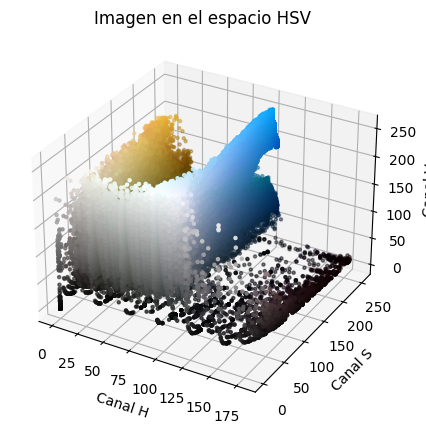

In [14]:
imagen_hsv = cv2.cvtColor(img_segmentacion, cv2.COLOR_BGR2HSV)
H, S, V = cv2.split(imagen_hsv)


fig = plt.figure(figsize=(5, 5))
axis = fig.add_subplot(1, 1, 1, projection="3d")

pixel_colors_hsv = img_segmentacion_rgb.reshape((np.shape(img_segmentacion_rgb)[0]*np.shape(img_segmentacion_rgb)[1], 3))
norm_hsv = colors.Normalize(vmin=-1., vmax=1.)
norm_hsv.autoscale(pixel_colors_hsv)
pixel_colors_hsv = norm_hsv(pixel_colors_hsv).tolist()

axis.scatter(H.flatten(), S.flatten(), V.flatten(), facecolors=pixel_colors_hsv, marker=".")
axis.set_title("Imagen en el espacio HSV")
axis.set_xlabel("Canal H")
axis.set_ylabel("Canal S")
axis.set_zlabel("Canal V")
plt.show()

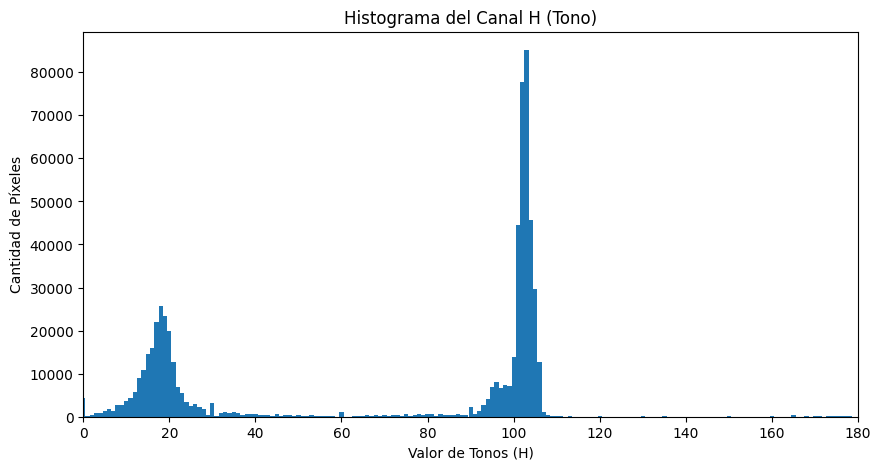

In [16]:
# Creando el histograma del canal H
histograma_H, bin_edges_H = np.histogram(H, bins=180, range=(0, 180))

# Visualizando el histograma del canal H
plt.figure(figsize=(10, 5))
plt.bar(bin_edges_H[:-1], histograma_H, width=1)
plt.xlim([0, 180])
plt.xlabel('Valor de Tonos (H)')
plt.ylabel('Cantidad de Píxeles')
plt.title('Histograma del Canal H (Tono)')
plt.show()


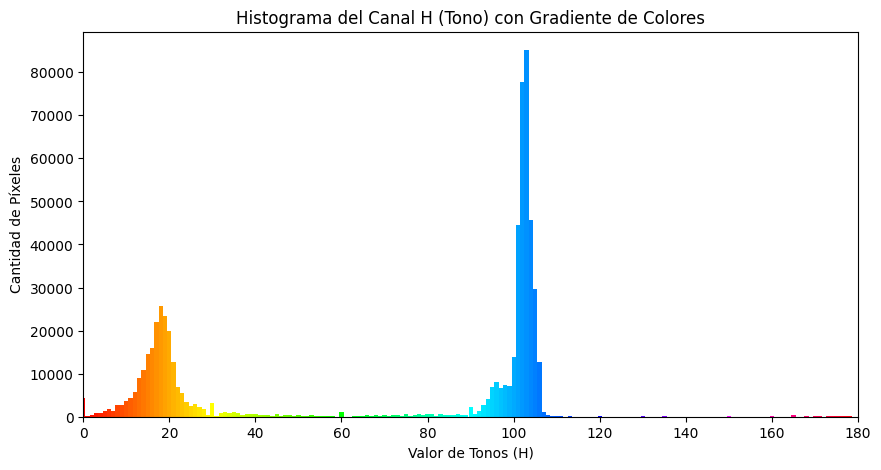

In [17]:
# Creando una gradiente de colores para el histograma del canal H
colores_gradiente = [colors.hsv_to_rgb((i/180, 1, 1)) for i in range(180)]

# Visualizando el histograma del canal H con la gradiente de colores
plt.figure(figsize=(10, 5))
plt.bar(bin_edges_H[:-1], histograma_H, width=1, color=colores_gradiente)
plt.xlim([0, 180])
plt.xlabel('Valor de Tonos (H)')
plt.ylabel('Cantidad de Píxeles')
plt.title('Histograma del Canal H (Tono) con Gradiente de Colores')
plt.show()


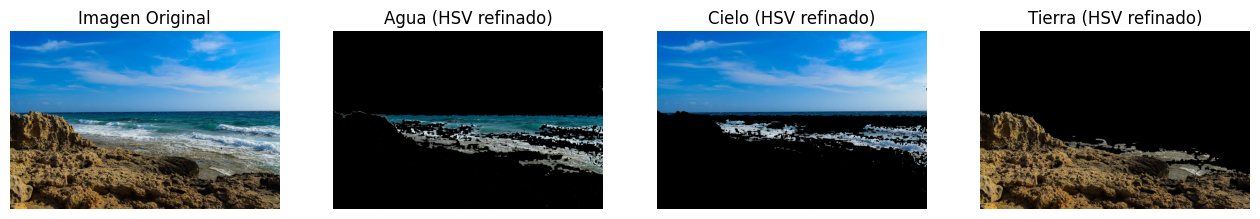

In [41]:
# Ajustando los umbrales para segmentar los diferentes elementos en el espacio HSV basados en la visualización 3D
# Estos umbrales se eligen visualmente y pueden ajustarse según la representación 3D
umbral_agua_hsv_refinado = ([31, 0, 0], [99, 255, 255])
umbral_cielo_hsv_refinado = ([100, 0, 0], [110, 255, 255])
umbral_tierra_hsv_refinado = ([0, 0, 0], [30, 255, 255])

# Creando máscaras para cada elemento
mascara_agua_hsv_refinado = cv2.inRange(imagen_hsv, tuple(umbral_agua_hsv_refinado[0]), tuple(umbral_agua_hsv_refinado[1]))
mascara_cielo_hsv_refinado = cv2.inRange(imagen_hsv, tuple(umbral_cielo_hsv_refinado[0]), tuple(umbral_cielo_hsv_refinado[1]))
mascara_tierra_hsv_refinado = cv2.inRange(imagen_hsv, tuple(umbral_tierra_hsv_refinado[0]), tuple(umbral_tierra_hsv_refinado[1]))

# Aplicando las máscaras
imagen_agua_hsv_refinado = cv2.bitwise_and(img_segmentacion_rgb, img_segmentacion_rgb, mask=mascara_agua_hsv_refinado)
imagen_cielo_hsv_refinado = cv2.bitwise_and(img_segmentacion_rgb, img_segmentacion_rgb, mask=mascara_cielo_hsv_refinado)
imagen_tierra_hsv_refinado = cv2.bitwise_and(img_segmentacion_rgb, img_segmentacion_rgb, mask=mascara_tierra_hsv_refinado)

# Visualizando las segmentaciones refinadas en el espacio HSV
fig, axs = plt.subplots(1, 4, figsize=(16, 4))

axs[0].imshow(img_segmentacion_rgb)
axs[0].axis('off')
axs[0].set_title('Imagen Original')

axs[1].imshow(imagen_agua_hsv_refinado)
axs[1].axis('off')
axs[1].set_title('Agua (HSV refinado)')

axs[2].imshow(imagen_cielo_hsv_refinado)
axs[2].axis('off')
axs[2].set_title('Cielo (HSV refinado)')

axs[3].imshow(imagen_tierra_hsv_refinado)
axs[3].axis('off')
axs[3].set_title('Tierra (HSV refinado)')

plt.show()
